In [1]:
]activate .; instantiate

 Activating environment at `C:\Users\Johannes\Documents\MEGA\Studium\BA\FastRunningMedian\benchmark\Project.toml`


In [2]:
using SortFilters, FastRunningMedian, BenchmarkTools, PyPlot, RollingFunctions, RCall

In [3]:
# window sizes
W = [5, 15, 51, 151, 515, 1515]
# input length
N = 1_000_000

x = rand(N)

1000000-element Array{Float64,1}:
 0.563680886195935
 0.25161806570871126
 0.48100751650152174
 0.7059503553002593
 0.6013151116365094
 0.21884802640831635
 0.481376753987218
 0.17923646683666705
 0.9019662936404553
 0.15870300734298448
 0.5394476081903925
 0.6314030467243432
 0.20958158835238505
 ⋮
 0.7667149618988147
 0.5617471659113193
 0.9594787162122176
 0.06082022223576833
 0.698671244131899
 0.9622428829164362
 0.7229130640886143
 0.7978110592506245
 0.9236896162332908
 0.9994802986404381
 0.6504273405705252
 0.6679678974016099

In [4]:
# arrays for Benchmark results
FRM_results = [] # FastRunningMedian
SF_results = [] # SortingFilters
RF_results = [] # RollingFilters
R_results = [] # R via RCall
xr = robject(x)
RR_mean = [] # R raw (natively benchmarked via R-package microbenchmark)
RR_min = []
RR_max = []
R"library(microbenchmark)"
R"x <- $x";

WARNING: Takes long time

In [5]:
for w in W
    trial_FRM = @benchmark running_median($x, $w)
    push!(FRM_results, trial_FRM)
    
    trial_SF = @benchmark movsort($x, $w, $.5)
    push!(SF_results, trial_SF)
    
    trial_RF = @benchmark runmedian($x, $w)
    push!(RF_results, trial_RF)
    
    wr = robject(w)
    trial_R = @benchmark rcopy(rcall(:runmed, $x, $w))
    push!(R_results, trial_R)
    
    R"w <- $w"
    R"result <- summary(microbenchmark(runmed(x, w)))"
    push!(RR_mean, rcopy(R"result['mean']")[1][1])
    push!(RR_min, rcopy(R"result['min']")[1][1])
    push!(RR_max, rcopy(R"result['max']")[1][1])
end

In [6]:
FRM_mean =  [(FRM_results[i]|>mean).time/1e9 for i in eachindex(FRM_results)]

6-element Array{Float64,1}:
 0.061541409792682925
 0.06439735746153846
 0.06898108902739726
 0.07248261871014493
 0.0771556106923077
 0.08093690477419356

In [7]:
FRM_min =  [(FRM_results[i]|>minimum).time/1e9 for i in eachindex(FRM_results)]

6-element Array{Float64,1}:
 0.044452201
 0.0509363
 0.0589384
 0.063317201
 0.0699969
 0.0775879

In [8]:
FRM_max =  [(FRM_results[i]|>maximum).time/1e9 for i in eachindex(FRM_results)]

6-element Array{Float64,1}:
 0.1343141
 0.098755999
 0.0843329
 0.0878868
 0.095904999
 0.0991094

In [9]:
SF_mean =  [(SF_results[i]|>mean).time/1e9 for i in eachindex(SF_results)]

6-element Array{Float64,1}:
 0.04123978433606557
 0.07667820296969696
 0.1712697467333333
 0.3452847666666667
 0.9140684501666666
 2.5200331

In [10]:
SF_min =  [(SF_results[i]|>minimum).time/1e9 for i in eachindex(SF_results)]

6-element Array{Float64,1}:
 0.036189701
 0.072315
 0.158722099
 0.3186687
 0.9006174
 2.518037101

In [11]:
SF_max =  [(SF_results[i]|>maximum).time/1e9 for i in eachindex(SF_results)]

6-element Array{Float64,1}:
 0.053335
 0.0897799
 0.194861801
 0.3782112
 0.9223089
 2.522029099

In [12]:
RF_mean =  [(RF_results[i]|>mean).time/1e9 for i in eachindex(RF_results)]

6-element Array{Float64,1}:
  0.16524329996774192
  0.40345780015384614
  1.3549540755
  4.14686095
 15.900743501
 52.571666

In [13]:
RF_min =  [(RF_results[i]|>minimum).time/1e9 for i in eachindex(RF_results)]

6-element Array{Float64,1}:
  0.1179768
  0.3575691
  1.2910118
  4.1030571
 15.900743501
 52.571666

In [14]:
RF_max =  [(RF_results[i]|>maximum).time/1e9 for i in eachindex(RF_results)]

6-element Array{Float64,1}:
  0.334244
  0.542703599
  1.423532101
  4.1906648
 15.900743501
 52.571666

In [15]:
R_mean =  [(R_results[i]|>mean).time/1e9 for i in eachindex(R_results)]

6-element Array{Float64,1}:
 0.07361479994117648
 0.09515746409433963
 0.11407522265909091
 0.126179367575
 0.14464733425714288
 0.21259239966666665

In [16]:
R_min =  [(R_results[i]|>minimum).time/1e9 for i in eachindex(R_results)]

6-element Array{Float64,1}:
 0.0580195
 0.082007101
 0.099118801
 0.1107153
 0.135367
 0.197772599

In [17]:
R_max =  [(R_results[i]|>maximum).time/1e9 for i in eachindex(R_results)]

6-element Array{Float64,1}:
 0.152876499
 0.126443401
 0.150841699
 0.169181099
 0.165868301
 0.234067199

In [18]:
# convert units
RR_mean .*= 1e-3
RR_min .*= 1e-3
RR_max .*= 1e-3

6-element Array{Any,1}:
 0.0437317
 0.0671563
 0.0822288
 0.0949592
 0.117801
 0.2314787

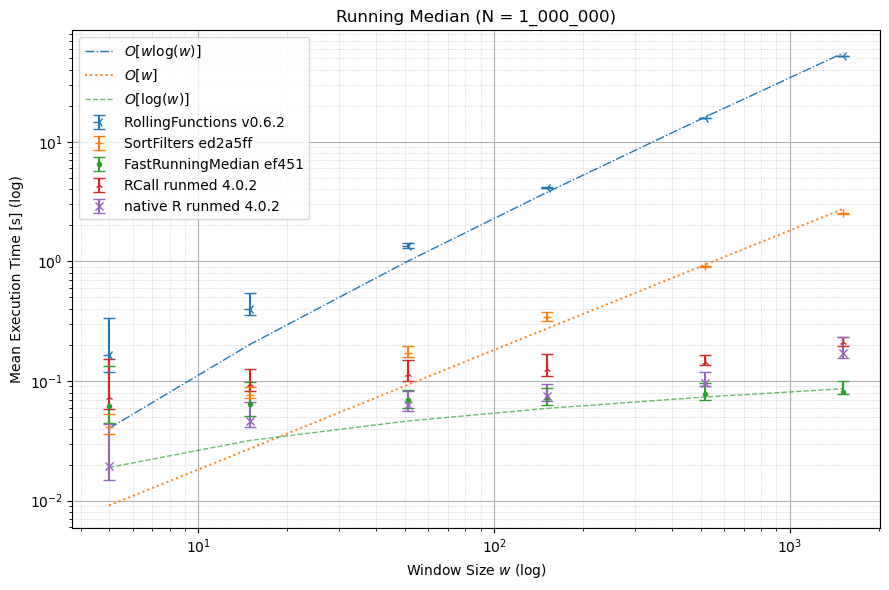

In [23]:
figure(figsize=[9, 6])
errorbar(W, RF_mean, [RF_mean .- RF_min RF_max .- RF_mean]|>transpose, fmt="3", capsize=4, markersize=8, label="RollingFunctions v0.6.2")
errorbar(W, SF_mean, [SF_mean .- SF_min SF_max .- SF_mean]|>transpose, fmt="+", capsize=4, markersize=6, label="SortFilters ed2a5ff")
errorbar(W, FRM_mean, [FRM_mean .- FRM_min FRM_max .- FRM_mean]|>transpose, fmt=".", capsize=4, label="FastRunningMedian ef451")
errorbar(W, R_mean, [R_mean .- R_min R_max .- R_mean]|>transpose, fmt="2", capsize=4, label="RCall runmed 4.0.2")
errorbar(W, RR_mean, [RR_mean .- RR_min RR_max .- RR_mean]|>transpose, fmt="x", capsize=4, label="native R runmed 4.0.2")
gca()[:set_prop_cycle](nothing)
plot(W, (log.(W).*W)./200, "-.", linewidth=1, label=L"O[w \log (w)]")
plot(W, W./550, ":", linewidth=1.4, label=L"O[w]")
plot(W, log.(W)./85, "--", alpha=.7, linewidth=1, label=L"O[\log (w)]")
loglog()
plt.minorticks_on()
grid(which="major")
grid(which="minor", linestyle=":", linewidth=.4)
ylabel("Mean Execution Time [s] (log)")
xlabel(L"Window Size $w$ (log)")
title("Running Median (N = 1_000_000)")
legend()
tight_layout()
savefig("../docs/src/Running Median Benchmarks.png")